In [1]:
import os
import pandas as pd
import stylia as st
from stylia import NamedColors, TWO_COLUMNS_WIDTH, ONE_COLUMN_WIDTH
import matplotlib.pyplot as plt

DATAPATH = "../data"
FIGUREPATH = "../figures"


def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(DATAPATH, "all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(DATAPATH, "all_molecules_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)


colors = NamedColors()
npc = colors.get("green")
spc = colors.get("purple")
red = colors.get("red")
blue = colors.get("blue")
gray = colors.get("gray")

In [3]:
df = load_data("eos8fth")
np = df[df["category"] == "natural"]
np = np.drop(columns=["file_name", "category"])
sd = df[df["category"] == "synthetic"]
sd = sd.drop(columns=["file_name", "category"])
db = pd.read_csv(os.path.join(DATAPATH, "drugbank_eos8fth.csv"))
cd = pd.read_csv(os.path.join(DATAPATH, "chemdiv", "chemdiv_eos8fth.csv"))
ch = pd.read_csv("~/Desktop/cheese_eos8fth.csv")

In [4]:
def boxplot_sars(ax, column):
    a = list(db[~db[column].isnull()][column])
    b = list(np[~np[column].isnull()][column])
    c = list(sd[~sd[column].isnull()][column])
    d = list(cd[~cd[column].isnull()][column])
    e = list(ch[~ch[column].isnull()][column])
    # Define colors for the boxes
    colors = [gray, npc, spc, red, blue]
    medianprops = dict(color="black")
    # Create the boxplot
    bp = ax.boxplot(
        [a, b, c, d, e], patch_artist=True, medianprops=medianprops, showfliers=False
    )

    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)

    # Optionally set x-axis labels
    ax.set_xticklabels(
        ["DrugBank", "Natural", "Synthetic", "ChemDiv", "Cheese"],
        rotation=45,
        ha="right",
    )

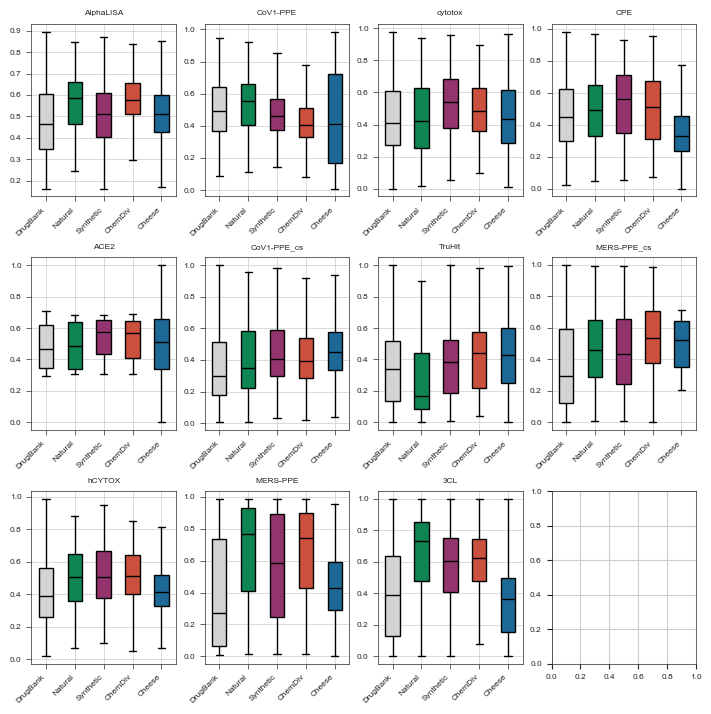

In [5]:
fig, axs = st.create_figure(3, 4, width=TWO_COLUMNS_WIDTH, height=TWO_COLUMNS_WIDTH)
for c in db.columns[2:]:
    ax = axs.next()
    boxplot_sars(ax, c)
    ax.set_title(c)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()

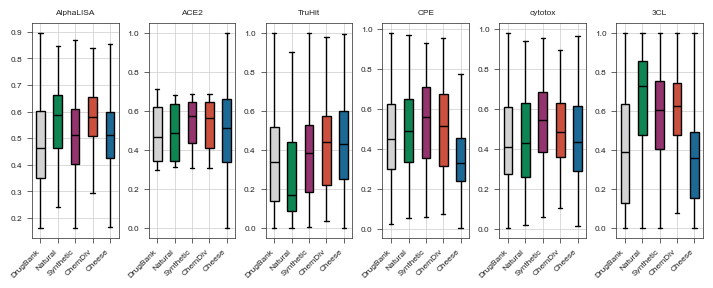

In [6]:
selcols = ["AlphaLISA", "ACE2", "TruHit", "CPE", "cytotox", "3CL"]
fig, axs = st.create_figure(
    1, 6, width=TWO_COLUMNS_WIDTH, height=TWO_COLUMNS_WIDTH / 2.5
)
for c in selcols:
    ax = axs.next()
    boxplot_sars(ax, c)
    ax.set_title(c)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()